# Text Pre-processing

In [ ]:
import pandas as pd
df = pd.read_csv('/content/text_segments.csv')

In [ ]:
import re
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.metrics.pairwise import cosine_similarity
ps = PorterStemmer()
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
lst = []
lst1 = []
for i in df.text:
  try:
    float(i) or int(i) 
       
  except ValueError:
    if len(i.split())>1:
      i = i.lower()
      i = re.sub('[^a-z]',' ',i)
      i = i.split()
      #i = [ps.stem(word) for word in i if not word in set(stopwords.words('english'))]
      i = ' '.join(i)
      if len(i.split())>1:
        print(i,',',len(i.split()))
        lst.append(len(i.split()))
        lst1.append(i)

Streaming output truncated to the last 5000 lines.
grocery retail and health and beauty stores , 7
attributable interests , 2
proportion of ordinary shares and voting powers at st december held by , 12
the group , 2
non controlling interests , 3
notes to the financial statements , 5
principal accounting policies , 3
basis of consolidation i the consolidated financial statements include the financial statements of the company its subsidiaries and the group s interests in associates and joint ventures , 27
ii a subsidiary is an entity over which the group has control the group controls an entity when the group is exposed to or has rights to variable returns from its involvement with the entity and has the ability to affect those returns through its power over the entity , 49
the purchase method of accounting is used to account for the acquisition of subsidiaries by the group the cost of an acquisition includes the fair value at the acquisition date of any contingent consideration the gro

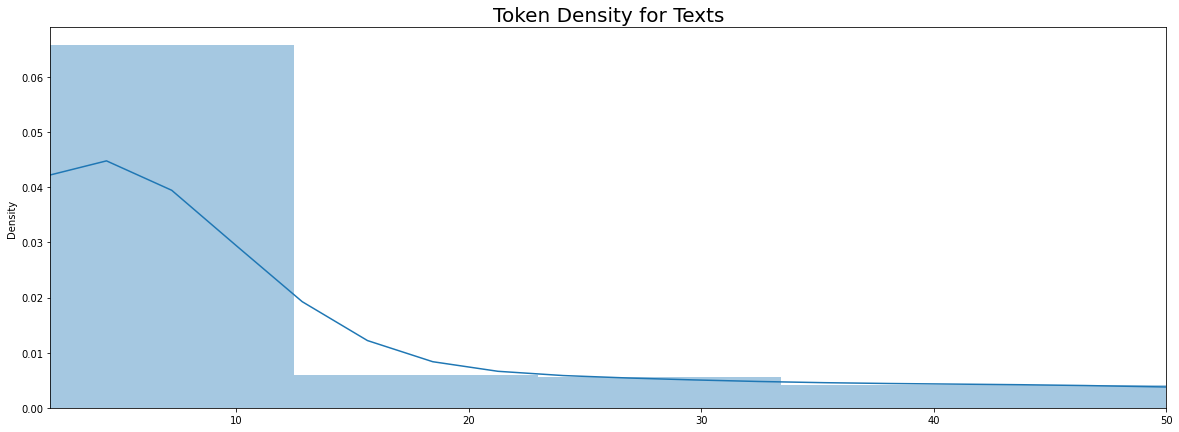

In [ ]:
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
#warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)
warnings.simplefilter(action="ignore", category=FutureWarning)
sns.distplot(lst)
plt.xlim([2,50])
plt.rcParams['figure.figsize'] = [20,7]
plt.title('Token Density for Texts',size=20)
plt.show()

In [ ]:
print('No. of texts that is found useful for futher filtering = ',len(lst))

No. of texts that is found useful for futher filtering =  5080


## Sentence Embedding for filtering out non-similar texts related to tax

### Token Length (2-4)

In [ ]:
lst2 = []
for i in lst1:
  if len(i.split())<=4:
    lst2.append(i)
    print(i)

derivative financial instruments
capital commitments
authorised not contracted
contracted not provided
positive fair value
forward foreign exchange contracts
interest rate swaps
forward foreign exchange contracts
negative fair value
positive fair value
negative fair value
contingent liabilities
related party transactions
current liabilities
net operating assets
share capital note
revenue and other reserves
shareholders funds
principal subsidiaries
company name
attributable interests
the group
non controlling interests
principal subsidiaries continued
company name
wellcome company limited
san miu supermarket limited
pt hero supermarket tbk
dfi lucky private limited
country of incorporation
hong kong
nature of business
property and food processing
grocery retail
home furnishings stores
grocery retail
health and beauty stores
health and beauty stores
attributable interests
the group
non controlling interests
principal accounting policies
principal accounting policies continued
principal a

In [ ]:
len(lst2)

2396

In [ ]:
!pip install -U sentence-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 85 kB 3.5 MB/s 
     |████████████████████████████████| 5.8 MB 19.4 MB/s 
     |████████████████████████████████| 1.3 MB 68.5 MB/s 
     |████████████████████████████████| 182 kB 67.1 MB/s 
     |████████████████████████████████| 7.6 MB 46.3 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=6d5014144ef617ea11ad8f6190e31eb9b59d0690facdf6dd63d56ed25f2be7bc
  Stored in directory: /root/.cache/pip/wheels/5e/6f/8c/d88aec621f3f542d26fac0342bef5e693335d125f4e54aeffe
Successfully built sentence-transformers


In [ ]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2')

Downloading:   0%|          | 0.00/968 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.79k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/645 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/471M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/239 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/9.08M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/480 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/14.8M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

In [ ]:
lst3 = []
for i in lst2:
  sentences = ["tax", i]
  embeddings = model.encode(sentences)
  if cosine_similarity([embeddings[0]],[embeddings[1]])[0][0] >= 0.3:
    print(i,',',cosine_similarity([embeddings[0]],[embeddings[1]])[0][0])
    lst3.append(i)

negative fair value , 0.32345268
negative fair value , 0.32345268
contingent liabilities , 0.34904653
related party transactions , 0.4018333
current liabilities , 0.36169797
share capital note , 0.3323141
revenue and other reserves , 0.32353345
shareholders funds , 0.3332531
principal accounting policies , 0.40006793
through other comprehensive income , 0.45414072
through profit and loss , 0.37236288
through other comprehensive income , 0.45414072
through profit and loss , 0.37236288
other financial liabilities , 0.38081843
other financial liabilities , 0.38081843
buying income , 0.54866016
volume based income , 0.42444173
profit and loss , 0.37254715
profit attributable to shareholders , 0.34419888
dividends per share us , 0.4262664
total assets , 0.3213556
total liabilities , 0.39013073
shareholders funds , 0.3332531
total equity , 0.35207593
net debt , 0.3592079
cash flow , 0.32430476
audit committee , 0.3556313
economic risk , 0.33865443
regulatory and political risk , 0.39359498
f

In [ ]:
len(lst3)

1102

In [ ]:
lst31 = []
for i in range(len(lst3)):
  sentences = ["currency", lst3[i]]
  embeddings = model.encode(sentences)
  if cosine_similarity([embeddings[0]],[embeddings[1]])[0][0] >= 0.6:
    print(lst3[i],',',cosine_similarity([embeddings[0]],[embeddings[1]])[0][0])
    lst31.append(i)

cash flow , 0.62443936
us million cash , 0.6136147
cash flow , 0.62443936
analysis by currency , 0.8363944
australian dollar , 0.7569834
new taiwan dollar , 0.6256559
singapore dollar , 0.6461097
united states dollar , 0.7204384
new taiwan dollar , 0.6256559
singapore dollar , 0.6461097
united states dollar , 0.7204384
new taiwan dollar , 0.6256559
united states dollar , 0.7204384
by currency , 0.94140357
cash cumulative , 0.676131


In [ ]:
lst32 = []
for i in range(len(lst3)):
  sentences = ["finance", lst3[i]]
  embeddings = model.encode(sentences)
  if cosine_similarity([embeddings[0]],[embeddings[1]])[0][0] >= 0.6:
    print(lst3[i],',',cosine_similarity([embeddings[0]],[embeddings[1]])[0][0])
    lst32.append(i)

current liabilities , 0.62772864
shareholders funds , 0.61647487
other financial liabilities , 0.680306
other financial liabilities , 0.680306
total liabilities , 0.6073195
shareholders funds , 0.61647487
net debt , 0.6585171
cash flow , 0.72982585
financial calendar , 0.6230123
financial review , 0.79061884
financial statements , 0.7823434
financial review , 0.79061884
financial review , 0.79061884
cash flow , 0.72982585
normal capital expenditure , 0.61229396
financing charges , 0.67352366
financing income , 0.8294584
net financing charges , 0.6432526
current liabilities , 0.62772864
shareholders funds , 0.61647487
financing activities , 0.80723846
net financing charges , 0.6432526
interest expense , 0.6595385
financing charges , 0.67352366
financing income , 0.8294584
financial liabilities , 0.7685895
current liabilities , 0.62772864
financial liabilities , 0.7685895
interest income , 0.6133136
interest expense , 0.6595385
financial assets , 0.7758954
underlying profit , 0.61346096


In [ ]:
for index in sorted(lst31, reverse=True):
    del lst3[index]

In [ ]:
for index in sorted(lst32, reverse=True):
    del lst3[index]

In [ ]:
len(lst3)

963

### Token Length (5 - 100+)

In [ ]:
lst5 = [i for i in lst1 if len(i.split()) >4]

In [ ]:
len(lst5)

2684

In [ ]:
lst51 = []
for i in lst5:
  sentences = ["tax", i]
  embeddings = model.encode(sentences)
  if cosine_similarity([embeddings[0]],[embeddings[1]])[0][0] >= 0.20:
    print(i,',',cosine_similarity([embeddings[0]],[embeddings[1]])[0][0])
    lst51.append(i)

notes to the financial statements , 0.31384343
interest rate swaps the notional principal amounts of the outstanding interest rate swap contracts were us million at st december and the fixed interest rates relating to interest rate swaps at per annum the fair values of interest rate swaps were based on the estimated cash flows discounted at market rate at per annum , 0.20431991
the outstanding interest rate swaps contracts of an aggregate notional principal and contract amount of us million at st december are impacted by the ibor reform , 0.24687582
total future sublease payments receivable amounted to us million us million , 0.25684267
the fair values of derivative financial instruments at st december are as follows , 0.2301091
designated as cash flow hedges , 0.23676595
designated as fair value hedges , 0.2622203
balances with group companies of jmh at st december and are immaterial unsecured and have no fixed terms of repayment , 0.20621468
details of directors remuneration being ke

In [ ]:
len(lst51)

1229

In [ ]:
lst52 = []
for i in range(len(lst51)):
  sentences = ["currency", lst51[i]]
  embeddings = model.encode(sentences)
  if cosine_similarity([embeddings[0]],[embeddings[1]])[0][0] > 0.5:
    print(lst51[i],',',cosine_similarity([embeddings[0]],[embeddings[1]])[0][0])
    lst52.append(i)

foreign currencies transactions in foreign currencies are accounted for at the exchange rates ruling at the transaction dates , 0.5860903
assets and liabilities of subsidiaries associates and joint ventures together with all other monetary assets and liabilities expressed in foreign currencies are translated into united states dollars at the rates of exchange ruling at the year end results expressed in foreign currencies are translated into united states dollars at the average rates of exchange ruling during the year which approximate the exchange rates at the dates of the transactions , 0.57489634
goodwill and fair value adjustments arising on acquisition of a foreign entity after st january are treated as assets and liabilities of the foreign entity and translated into united states dollars at the rates of exchange ruling at the year end , 0.5039346
currency risks as defined by ifrs arise on account of monetary assets and liabilities being denominated in a currency that is not the fu

In [ ]:
lst53 = []
for i in range(len(lst51)):
  sentences = ["finance", lst51[i]]
  embeddings = model.encode(sentences)
  if cosine_similarity([embeddings[0]],[embeddings[1]])[0][0] > 0.6:
    print(lst51[i],',',cosine_similarity([embeddings[0]],[embeddings[1]])[0][0])
    lst53.append(i)

notes to the financial statements , 0.67757785
notes to the financial statements , 0.67757785
notes to the financial statements , 0.67757785
notes to the financial statements , 0.67757785
notes to the financial statements , 0.67757785
notes to the financial statements , 0.67757785
notes to the financial statements , 0.67757785
notes to the financial statements , 0.67757785
notes to the financial statements , 0.67757785
notes to the financial statements , 0.67757785
notes to the financial statements , 0.67757785
notes to the financial statements , 0.67757785
cash flows from investing activities , 0.62441707
cash flows before financing activities , 0.66264766
cash flows from investing activities , 0.62441707
cash flows from financing activities , 0.71304095
notes to the financial statements , 0.67757785
notes to the financial statements , 0.67757785
notes to the financial statements , 0.67757785
notes to the financial statements , 0.67757785
notes to the financial statements , 0.67757785

In [ ]:
for i in sorted(lst52,reverse=True):
  del lst51[i]

In [ ]:
for i in sorted(lst53,reverse=True):
  del lst51[i]

In [ ]:
lst3.extend(lst51)

In [ ]:
len(lst3)

2147

In [ ]:
ddf = pd.DataFrame(data=lst3,columns=['text'])
len(ddf['text'].unique())

1139

In [ ]:
dff = pd.DataFrame(data=ddf['text'].unique(),columns=['text'])
dff.head()

,text
0,negative fair value
1,contingent liabilities
2,related party transactions
3,share capital note
4,revenue and other reserves


In [ ]:
dff.to_csv('text.csv')

# Zero-Shot Text Classification for segregation of different taxonomy categories 

## $1^{st}$ Level-segregation

In [ ]:
!pip install transformers
!pip install sentencepiece

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.8 MB 7.8 MB/s 
     |████████████████████████████████| 7.6 MB 44.6 MB/s 
     |████████████████████████████████| 182 kB 69.3 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.3 MB 9.7 MB/s 


In [ ]:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
import numpy 
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
import pandas as pd

In [ ]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer
nli_model = AutoModelForSequenceClassification.from_pretrained('joeddav/xlm-roberta-large-xnli')
tokenizer = AutoTokenizer.from_pretrained('facebook/bart-large-mnli')

Some weights of the model checkpoint at joeddav/xlm-roberta-large-xnli were not used when initializing XLMRobertaForSequenceClassification: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing XLMRobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
dff = pd.read_csv('/content/text.csv')

In [ ]:
l = []
candidate_labels = ["approach to tax","Tax governance"]
for i in dff.text:
  for j in candidate_labels:
    premise = i
    hypothesis = f'This example is {j}.'
    # run through model pre-trained on MNLI
    x = tokenizer.encode(premise, hypothesis, return_tensors='pt',
                        truncation_strategy='only_first')
    logits = nli_model(x.to(device))[0]

    entail_contradiction_logits = logits[:,[0,2]]
    probs = entail_contradiction_logits.softmax(dim=1)
    prob_label_is_true = probs[:,1]
    l.append((prob_label_is_true.detach().numpy()[0],j))
    print(prob_label_is_true.detach().numpy()[0],j)

0.3963693 approach to tax
0.42593768 Tax governance
0.28060293 approach to tax
0.28885293 Tax governance
0.44906545 approach to tax
0.35855314 Tax governance
0.49985036 approach to tax
0.40168464 Tax governance
0.22923505 approach to tax
0.33760273 Tax governance
0.3605945 approach to tax
0.34456643 Tax governance
0.43061188 approach to tax
0.421551 Tax governance
0.6200662 approach to tax
0.49298903 Tax governance
0.44569588 approach to tax
0.45045483 Tax governance
0.4813532 approach to tax
0.38470605 Tax governance
0.55049205 approach to tax
0.4749589 Tax governance
0.42775205 approach to tax
0.40836415 Tax governance
0.39773178 approach to tax
0.37416154 Tax governance
0.38313982 approach to tax
0.3873842 Tax governance
0.26693666 approach to tax
0.57714415 Tax governance
0.3826082 approach to tax
0.3816793 Tax governance
0.5939021 approach to tax
0.53446746 Tax governance
0.46315646 approach to tax
0.4591143 Tax governance
0.37845063 approach to tax
0.42903557 Tax governance
0.429

In [ ]:
c = []
for i in range(0,len(l)-1,2):
  if l[i][0] > l[i+1][0]:
    c.append(l[i][1])
    print(l[i][1])
  else:
    c.append(l[i+1][1])
    print(l[i+1][1])

Tax governance
Tax governance
approach to tax
approach to tax
Tax governance
approach to tax
approach to tax
approach to tax
Tax governance
approach to tax
approach to tax
approach to tax
approach to tax
Tax governance
Tax governance
approach to tax
approach to tax
approach to tax
Tax governance
approach to tax
approach to tax
approach to tax
approach to tax
approach to tax
approach to tax
approach to tax
Tax governance
approach to tax
approach to tax
approach to tax
approach to tax
Tax governance
Tax governance
approach to tax
approach to tax
approach to tax
approach to tax
Tax governance
approach to tax
approach to tax
approach to tax
approach to tax
Tax governance
Tax governance
Tax governance
approach to tax
Tax governance
approach to tax
approach to tax
approach to tax
approach to tax
approach to tax
approach to tax
approach to tax
approach to tax
Tax governance
Tax governance
Tax governance
approach to tax
approach to tax
Tax governance
approach to tax
approach to tax
approach to

In [ ]:
dff = dff.drop(['Unnamed: 0'],axis=1)

In [ ]:
dff['parent_category'] = pd.DataFrame(c)

In [ ]:
dff

,text,parent_category
0,negative fair value,Tax governance
1,contingent liabilities,Tax governance
2,related party transactions,approach to tax
3,share capital note,approach to tax
4,revenue and other reserves,Tax governance
...,...,...
1134,the remainder of this report focuses on taxes ...,Tax governance
1135,tax contribution in our taxes paid globally we...,Tax governance
1136,in we paid m of tax globally of which m was pa...,approach to tax
1137,total taxes paid by region in,Tax governance


In [ ]:
dff.to_csv('text1.csv')

# $2^{nd}$ Level-segregation

In [ ]:
import pandas as pd
d = pd.read_csv('/content/taxonomy.csv')

In [ ]:
list(d[d['parent_category'] == 'approach to tax']['child_category'])

['tax strategy',
 'tax havens',
 'tax incentives',
 'transfer pricing',
 'Governance body that reviews tax strategy',
 'Frequency of review of tax strategy',
 'Approach to regulatory compliance',
 'Approach to tax laws',
 'Organisation’s intent of tax laws',
 'Organisation’s compliance with the law',
 'tax strategy alignment with commercial activities',
 'Economic impact of approach to tax',
 'social impact of approach to tax']

In [ ]:
list(d[d['parent_category'] == 'Tax governance']['child_category'])

['Implementation of tax governance',
 'Control and risk management systems',
 'Details of governance body accountable for compliance with tax strategy',
 'Degree to which highest governance body can oversee compliance of tax strategy',
 'Accountability for compliance delegated to executive level positions',
 'Processes that support adherence to tax strategy',
 'Programs that support adherence to tax strategy',
 'Tax risk management practices',
 'Tax risk identification',
 'Tax risk management',
 'Tax risk monitoring',
 'Evaluation of compliance performed on tax governance']

In [ ]:
d[d['parent_category'] == 'approach to tax'][['child_category','breakdown_by']]

,child_category,breakdown_by
0,tax strategy,approach_by_practices
1,tax havens,approach_by_practices
2,tax incentives,approach_by_practices
3,transfer pricing,approach_by_practices
4,Governance body that reviews tax strategy,approach_by_governance
5,Frequency of review of tax strategy,approach_by_governance
6,Approach to regulatory compliance,approach_by_compliance
7,Approach to tax laws,approach_by_compliance
8,Organisation’s intent of tax laws,approach_by_compliance
9,Organisation’s compliance with the law,approach_by_compliance


In [ ]:
d[d['parent_category'] == 'Tax governance'][['child_category','breakdown_by']]

,child_category,breakdown_by
13,Implementation of tax governance,governance_by_operation
14,Control and risk management systems,governance_by_operation
15,Details of governance body accountable for com...,governance_by_governing_body
16,Degree to which highest governance body can ov...,governance_by_governing_body
17,Accountability for compliance delegated to exe...,governance_by_governing_body
18,Processes that support adherence to tax strategy,governance_by_process
19,Programs that support adherence to tax strategy,governance_by_process
20,Tax risk management practices,governance_by_risk_management
21,Tax risk identification,governance_by_risk_management
22,Tax risk management,governance_by_risk_management


In [ ]:
dff = pd.read_csv('/content/text1.csv')

In [ ]:
dff1 = dff[dff['parent_category'] == 'approach to tax']
dff2 = dff[dff['parent_category'] == 'Tax governance']

### Breaking 'Approach to tax' into Child Categories

In [ ]:
l12 = []
candidate_labels = list(d[d['parent_category'] == 'approach to tax']['child_category'])
for i in dff1.text:
  for j in candidate_labels:
    premise = i
    hypothesis = f'This example is {j}.'
    # run through model pre-trained on MNLI
    x = tokenizer.encode(premise, hypothesis, return_tensors='pt',
                        truncation_strategy='only_first')
    logits = nli_model(x.to(device))[0]

    entail_contradiction_logits = logits[:,[0,2]]
    probs = entail_contradiction_logits.softmax(dim=1)
    prob_label_is_true = probs[:,1]
    l12.append((prob_label_is_true.detach().numpy()[0],j))
    print(prob_label_is_true.detach().numpy()[0],j)
  

In [ ]:
io = pd.read_csv('/content/text_test.csv')
io

,Unnamed: 0,0,1
0,0,0.536556,tax strategy
1,1,0.356631,tax havens
2,2,0.424487,tax incentives
3,3,0.372701,transfer pricing
4,4,0.477508,Governance body that reviews tax strategy
...,...,...,...
8718,8718,0.397250,Organisation’s intent of tax laws
8719,8719,0.535177,Organisation’s compliance with the law
8720,8720,0.473624,tax strategy alignment with commercial activities
8721,8721,0.698088,Economic impact of approach to tax


In [ ]:
x = list(io['0'])
t = []
for i in range(0,len(x),13):
  t.append(max(x[i:i+13]))

In [ ]:
import numpy as np
i1 = io[io['0'].isin(t)]
i1.index = np.arange(0,671,1)

In [ ]:
i1.rename(columns={'1': 'child_category','0': 'child_category_score'},inplace=True)

In [ ]:
i1

,Unnamed: 0,child_category_score,child_category
0,12,0.657057,social impact of approach to tax
1,22,0.673404,Organisation’s compliance with the law
2,35,0.497928,Organisation’s compliance with the law
3,48,0.614123,Organisation’s compliance with the law
4,63,0.631038,Economic impact of approach to tax
...,...,...,...
666,8662,0.592880,Governance body that reviews tax strategy
667,8675,0.554921,Governance body that reviews tax strategy
668,8684,0.691236,tax strategy
669,8702,0.436869,Frequency of review of tax strategy


In [ ]:
dff1.index = np.arange(0,671,1)
dff1 = pd.concat([dff1.drop(['Unnamed: 0'],axis=1),i1[['child_category','child_category_score']]],axis=1)

In [ ]:
dff1

,text,parent_category,child_category,child_category_score
0,related party transactions,approach to tax,social impact of approach to tax,0.657057
1,share capital note,approach to tax,Organisation’s compliance with the law,0.673404
2,principal accounting policies,approach to tax,Organisation’s compliance with the law,0.497928
3,through other comprehensive income,approach to tax,Organisation’s compliance with the law,0.614123
4,through profit and loss,approach to tax,Economic impact of approach to tax,0.631038
...,...,...,...,...
666,net vat collected we collect vat and sales tax...,approach to tax,Governance body that reviews tax strategy,0.592880
667,other taxes collected we collect a number of o...,approach to tax,Governance body that reviews tax strategy,0.554921
668,we also collect withholding taxes on some inte...,approach to tax,tax strategy,0.691236
669,in we paid m of tax globally of which m was pa...,approach to tax,Frequency of review of tax strategy,0.436869


### Breaking 'Tax Governance' into Child Categories

In [ ]:
l11 = []
candidate_labels = list(d[d['parent_category'] == 'Tax governance']['child_category'])
for i in dff2.text:
  for j in candidate_labels:
    premise = i
    hypothesis = f'This example is {j}.'
    # run through model pre-trained on MNLI
    x = tokenizer.encode(premise, hypothesis, return_tensors='pt',
                        truncation_strategy='only_first')
    logits = nli_model(x.to(device))[0]
    entail_contradiction_logits = logits[:,[0,2]]
    probs = entail_contradiction_logits.softmax(dim=1)
    prob_label_is_true = probs[:,1]
    l11.append((prob_label_is_true.detach().numpy()[0],j))
    print(prob_label_is_true.detach().numpy()[0],j)

Streaming output truncated to the last 5000 lines.
0.3148702 Accountability for compliance delegated to executive level positions
0.6265881 Processes that support adherence to tax strategy
0.4914931 Programs that support adherence to tax strategy
0.35453314 Tax risk management practices
0.33563763 Tax risk identification
0.3389555 Tax risk management
0.3470447 Tax risk monitoring
0.33695832 Evaluation of compliance performed on tax governance
0.3999061 Implementation of tax governance
0.3319478 Control and risk management systems
0.0075828014 Details of governance body accountable for compliance with tax strategy
0.16815946 Degree to which highest governance body can oversee compliance of tax strategy
0.30505306 Accountability for compliance delegated to executive level positions
0.57274824 Processes that support adherence to tax strategy
0.41391218 Programs that support adherence to tax strategy
0.322483 Tax risk management practices
0.37441063 Tax risk identification
0.33798495 Tax r

In [ ]:
r1 = pd.DataFrame(l11)

In [ ]:
r1

,0,1
0,0.394456,Implementation of tax governance
1,0.305939,Control and risk management systems
2,0.462664,Details of governance body accountable for com...
3,0.421152,Degree to which highest governance body can ov...
4,0.393547,Accountability for compliance delegated to exe...
...,...,...
5611,0.350651,Tax risk management practices
5612,0.365128,Tax risk identification
5613,0.360462,Tax risk management
5614,0.430451,Tax risk monitoring


In [ ]:
t1 = []
x1 = list(r1[0])
for i in range(0,len(x1),12):
  #print(max(x1[i:i+12]))
  t1.append(max(x1[i:i+12]))

In [ ]:
r2 = r1[r1[0].isin(t1)]
r2.index = np.arange(0,468,1)
r2.rename(columns={1:'child_category'},inplace=True)

In [ ]:
dff2.index = np.arange(0,468,1)
dff2 = pd.concat([dff2.drop(['Unnamed: 0'],axis=1),r2['child_category']],axis=1)

In [ ]:
dff2

,text,parent_category,child_category
0,negative fair value,Tax governance,Processes that support adherence to tax strategy
1,contingent liabilities,Tax governance,Processes that support adherence to tax strategy
2,revenue and other reserves,Tax governance,Processes that support adherence to tax strategy
3,buying income,Tax governance,Processes that support adherence to tax strategy
4,total assets,Tax governance,Evaluation of compliance performed on tax gove...
...,...,...,...
463,tax contribution here we find a summary of how...,Tax governance,Processes that support adherence to tax strategy
464,bank levy other taxes m,Tax governance,Processes that support adherence to tax strategy
465,the remainder of this report focuses on taxes ...,Tax governance,Processes that support adherence to tax strategy
466,tax contribution in our taxes paid globally we...,Tax governance,Processes that support adherence to tax strategy


In [ ]:
dff2['child_category_score'] = pd.DataFrame(t1)

In [ ]:
dff2

,text,parent_category,child_category,child_category_score
0,negative fair value,Tax governance,Processes that support adherence to tax strategy,0.566944
1,contingent liabilities,Tax governance,Processes that support adherence to tax strategy,0.481571
2,revenue and other reserves,Tax governance,Processes that support adherence to tax strategy,0.547791
3,buying income,Tax governance,Processes that support adherence to tax strategy,0.599365
4,total assets,Tax governance,Evaluation of compliance performed on tax gove...,0.434922
...,...,...,...,...
463,tax contribution here we find a summary of how...,Tax governance,Processes that support adherence to tax strategy,0.648756
464,bank levy other taxes m,Tax governance,Processes that support adherence to tax strategy,0.652435
465,the remainder of this report focuses on taxes ...,Tax governance,Processes that support adherence to tax strategy,0.550374
466,tax contribution in our taxes paid globally we...,Tax governance,Processes that support adherence to tax strategy,0.714057


In [ ]:
dff3 = pd.concat([dff1,dff2],axis=0)
dff3.index = np.arange(0,1139,1)
dff3

,text,parent_category,child_category,child_category_score
0,related party transactions,approach to tax,social impact of approach to tax,0.657057
1,share capital note,approach to tax,Organisation’s compliance with the law,0.673404
2,principal accounting policies,approach to tax,Organisation’s compliance with the law,0.497928
3,through other comprehensive income,approach to tax,Organisation’s compliance with the law,0.614123
4,through profit and loss,approach to tax,Economic impact of approach to tax,0.631038
...,...,...,...,...
1134,tax contribution here we find a summary of how...,Tax governance,Processes that support adherence to tax strategy,0.648756
1135,bank levy other taxes m,Tax governance,Processes that support adherence to tax strategy,0.652435
1136,the remainder of this report focuses on taxes ...,Tax governance,Processes that support adherence to tax strategy,0.550374
1137,tax contribution in our taxes paid globally we...,Tax governance,Processes that support adherence to tax strategy,0.714057


In [ ]:
g = {}
for i,j in zip(d.child_category,d.breakdown_by):
  g[i] = j

In [ ]:
dff3['breakdown_by'] = dff3['child_category'].map(g)

In [ ]:
dff3.to_csv('text_final.csv',index=False)

## Fitting the other required columns in the cleaned dataset

In [ ]:
dd = pd.read_csv('/content/text_segments.csv')
dd.head()

,text,pagenum,doc_name
0,Notes to the Financial Statements,100,dairy-farm_ar2020pdf
1,Forward foreign exchange contracts The contrac...,100,dairy-farm_ar2020pdf
2,Interest rate swaps The notional principal amo...,100,dairy-farm_ar2020pdf
3,The outstanding interest rate swaps contracts ...,100,dairy-farm_ar2020pdf
4,Operating lease commitments for short-term and...,100,dairy-farm_ar2020pdf


In [ ]:
dd['text'] = dd['text'].apply(lambda x: str(x))
dd['text'] = dd['text'].apply(lambda x: x.lower())
dd['text'] = dd['text'].apply(lambda x: re.sub('[^a-z]',' ',x))
dd['text'] = dd['text'].apply(lambda x: ' '.join(x.split()))
dd1 = dd[dd['text'].isin(list(dff3['text']))]

In [ ]:
dd1

,text,pagenum,doc_name
0,notes to the financial statements,100,dairy-farm_ar2020pdf
2,interest rate swaps the notional principal amo...,100,dairy-farm_ar2020pdf
3,the outstanding interest rate swaps contracts ...,100,dairy-farm_ar2020pdf
5,total future sublease payments receivable amou...,100,dairy-farm_ar2020pdf
8,the fair values of derivative financial instru...,100,dairy-farm_ar2020pdf
...,...,...,...
10325,in we paid m of tax globally of which m was pa...,9,with-highlights-comments-barclays-country-snap...
10327,tax contribution,9,with-highlights-comments-barclays-country-snap...
10328,total taxes paid by region in,9,with-highlights-comments-barclays-country-snap...
10330,approach to tax,9,with-highlights-comments-barclays-country-snap...


In [ ]:
text_uniq = list(dff3.text)
lt = ['pagenum','doc_name'] 

In [ ]:
o1 = []
for i in text_uniq:
  o1.append(sorted(list(dd1[dd1['text'] == i][lt[0]].value_counts().index)))

for i in range(len(o1)):
  o1[i] = str(o1[i])

n1 = pd.DataFrame(data=o1,columns=['pagenum'])
n1['pagenum'] = n1['pagenum'].apply(lambda x: re.sub('[^0-9,]',' ',x))
dff3['pagenum'] = n1['pagenum']

In [ ]:
dff3.head(15)

,text,parent_category,child_category,child_category_score,breakdown_by,pagenum
0,related party transactions,approach to tax,social impact of approach to tax,0.657057,approach_by_activity,101
1,share capital note,approach to tax,Organisation’s compliance with the law,0.673404,approach_by_compliance,102
2,principal accounting policies,approach to tax,Organisation’s compliance with the law,0.497928,approach_by_compliance,104
3,through other comprehensive income,approach to tax,Organisation’s compliance with the law,0.614123,approach_by_compliance,119
4,through profit and loss,approach to tax,Economic impact of approach to tax,0.631038,approach_by_activity,119
5,volume based income,approach to tax,tax strategy,0.622111,approach_by_practices,129
6,profit and loss,approach to tax,social impact of approach to tax,0.595066,approach_by_activity,137
7,profit attributable to shareholders,approach to tax,Organisation’s compliance with the law,0.519522,approach_by_compliance,"7, 68, 69, 137"
8,dividends per share us,approach to tax,Economic impact of approach to tax,0.459465,approach_by_activity,137
9,economic risk,approach to tax,Organisation’s compliance with the law,0.484110,approach_by_compliance,151


In [ ]:
o1 = []
for i in text_uniq:
  o1.append(sorted(list(dd1[dd1['text'] == i][lt[1]].value_counts().index)))

for i in range(len(o1)):
  o1[i] = str(o1[i])

n1 = pd.DataFrame(data=o1,columns=[lt[1]])
n1[lt[1]] = n1[lt[1]].apply(lambda x: re.sub('[^a-zA-Z0-9,_\-]',' ',x))
dff3[lt[1]] = n1[lt[1]]

In [ ]:
dff3.head(15)

,text,parent_category,child_category,child_category_score,breakdown_by,pagenum,doc_name
0,related party transactions,approach to tax,social impact of approach to tax,0.657057,approach_by_activity,101,dairy-farm_ar2020pdf
1,share capital note,approach to tax,Organisation’s compliance with the law,0.673404,approach_by_compliance,102,dairy-farm_ar2020pdf
2,principal accounting policies,approach to tax,Organisation’s compliance with the law,0.497928,approach_by_compliance,104,dairy-farm_ar2020pdf
3,through other comprehensive income,approach to tax,Organisation’s compliance with the law,0.614123,approach_by_compliance,119,dairy-farm_ar2020pdf
4,through profit and loss,approach to tax,Economic impact of approach to tax,0.631038,approach_by_activity,119,dairy-farm_ar2020pdf
5,volume based income,approach to tax,tax strategy,0.622111,approach_by_practices,129,dairy-farm_ar2020pdf
6,profit and loss,approach to tax,social impact of approach to tax,0.595066,approach_by_activity,137,dairy-farm_ar2020pdf
7,profit attributable to shareholders,approach to tax,Organisation’s compliance with the law,0.519522,approach_by_compliance,"7, 68, 69, 137",dairy-farm_ar2020pdf
8,dividends per share us,approach to tax,Economic impact of approach to tax,0.459465,approach_by_activity,137,dairy-farm_ar2020pdf
9,economic risk,approach to tax,Organisation’s compliance with the law,0.484110,approach_by_compliance,151,dairy-farm_ar2020pdf


In [ ]:
dff3.rename(columns={'child_category_score': 'relevence_score'})

,text,parent_category,child_category,relevence_score,breakdown_by,pagenum,doc_name
0,related party transactions,approach to tax,social impact of approach to tax,0.657057,approach_by_activity,101,dairy-farm_ar2020pdf
1,share capital note,approach to tax,Organisation’s compliance with the law,0.673404,approach_by_compliance,102,dairy-farm_ar2020pdf
2,principal accounting policies,approach to tax,Organisation’s compliance with the law,0.497928,approach_by_compliance,104,dairy-farm_ar2020pdf
3,through other comprehensive income,approach to tax,Organisation’s compliance with the law,0.614123,approach_by_compliance,119,dairy-farm_ar2020pdf
4,through profit and loss,approach to tax,Economic impact of approach to tax,0.631038,approach_by_activity,119,dairy-farm_ar2020pdf
...,...,...,...,...,...,...,...
1134,tax contribution here we find a summary of how...,Tax governance,Processes that support adherence to tax strategy,0.648756,governance_by_process,8,with-highlights-comments-barclays-country-sn...
1135,bank levy other taxes m,Tax governance,Processes that support adherence to tax strategy,0.652435,governance_by_process,8,with-highlights-comments-barclays-country-sn...
1136,the remainder of this report focuses on taxes ...,Tax governance,Processes that support adherence to tax strategy,0.550374,governance_by_process,8,with-highlights-comments-barclays-country-sn...
1137,tax contribution in our taxes paid globally we...,Tax governance,Processes that support adherence to tax strategy,0.714057,governance_by_process,9,with-highlights-comments-barclays-country-sn...


In [ ]:
dff3.to_csv('text_segment1.csv',index=False)

In [ ]:
import pandas as pd
g = pd.read_csv('/content/text_segment1.csv')
g.columns

Index(['text', 'parent_category', 'child_category', 'child_category_score',
       'breakdown_by', 'pagenum', 'doc_name'],
      dtype='object')

In [ ]:
g['child_category_score'] = g['child_category_score']*100

In [ ]:
g[(g['parent_category']== 'approach to tax') & (g['child_category_score'] >0.5) & (g['child_category_score'] <0.7)]

,text,parent_category,child_category,child_category_score,breakdown_by,pagenum,doc_name
0,related party transactions,approach to tax,social impact of approach to tax,0.657057,approach_by_activity,101,dairy-farm_ar2020pdf
1,share capital note,approach to tax,Organisation’s compliance with the law,0.673404,approach_by_compliance,102,dairy-farm_ar2020pdf
3,through other comprehensive income,approach to tax,Organisation’s compliance with the law,0.614123,approach_by_compliance,119,dairy-farm_ar2020pdf
4,through profit and loss,approach to tax,Economic impact of approach to tax,0.631038,approach_by_activity,119,dairy-farm_ar2020pdf
5,volume based income,approach to tax,tax strategy,0.622111,approach_by_practices,129,dairy-farm_ar2020pdf
...,...,...,...,...,...,...,...
664,net vat collected other taxes collected m,approach to tax,Organisation’s compliance with the law,0.650389,approach_by_compliance,8,with-highlights-comments-barclays-country-sn...
666,net vat collected we collect vat and sales tax...,approach to tax,Governance body that reviews tax strategy,0.592880,approach_by_governance,8,with-highlights-comments-barclays-country-sn...
667,other taxes collected we collect a number of o...,approach to tax,Governance body that reviews tax strategy,0.554921,approach_by_governance,8,with-highlights-comments-barclays-country-sn...
668,we also collect withholding taxes on some inte...,approach to tax,tax strategy,0.691236,approach_by_practices,8,with-highlights-comments-barclays-country-sn...


## To pullout the exact text that was provided

In [ ]:
h = pd.read_csv('/content/text_segments.csv')
h.head()

,text,pagenum,doc_name
0,Notes to the Financial Statements,100,dairy-farm_ar2020pdf
1,Forward foreign exchange contracts The contrac...,100,dairy-farm_ar2020pdf
2,Interest rate swaps The notional principal amo...,100,dairy-farm_ar2020pdf
3,The outstanding interest rate swaps contracts ...,100,dairy-farm_ar2020pdf
4,Operating lease commitments for short-term and...,100,dairy-farm_ar2020pdf


In [ ]:
import numpy as np

In [ ]:
try:
  for i in g['text']:
    h['text_new'] = h['text'].apply(lambda x: i if i in x  else np.nan)
except TypeError:
  pass

In [ ]:
h

,text,pagenum,doc_name
0,Notes to the Financial Statements,100,dairy-farm_ar2020pdf
1,Forward foreign exchange contracts The contrac...,100,dairy-farm_ar2020pdf
2,Interest rate swaps The notional principal amo...,100,dairy-farm_ar2020pdf
3,The outstanding interest rate swaps contracts ...,100,dairy-farm_ar2020pdf
4,Operating lease commitments for short-term and...,100,dairy-farm_ar2020pdf
...,...,...,...
10337,Barclays PLC Country Snapshot 2021,9,with-highlights-comments-barclays-country-snap...
10338,£492m,9,with-highlights-comments-barclays-country-snap...
10339,Rest of Europe,9,with-highlights-comments-barclays-country-snap...
10340,£134m,9,with-highlights-comments-barclays-country-snap...


In [ ]:
import re
h['text'] = h['text'].apply(lambda x: str(x))
h['text'] = h['text'].apply(lambda x: x.lower())
h['text'] = h['text'].apply(lambda x: re.sub('[^a-z]',' ',x))
h['text'] = h['text'].apply(lambda x: ' '.join(x.split()))

In [ ]:
l = []
for i in list(h['text']):
  if i in list(g['text']):
    l.append(list(h['text']).index(i))

In [ ]:
h1 = pd.read_csv('/content/text_segments.csv')
h2 = h1[h1.index.isin(l)]

In [ ]:
h[h.index.isin(l)]

,text,pagenum,doc_name
0,notes to the financial statements,100,dairy-farm_ar2020pdf
2,interest rate swaps the notional principal amo...,100,dairy-farm_ar2020pdf
3,the outstanding interest rate swaps contracts ...,100,dairy-farm_ar2020pdf
5,total future sublease payments receivable amou...,100,dairy-farm_ar2020pdf
8,the fair values of derivative financial instru...,100,dairy-farm_ar2020pdf
...,...,...,...
10322,tax contribution in our taxes paid globally we...,9,with-highlights-comments-barclays-country-snap...
10324,taxes paid by region,9,with-highlights-comments-barclays-country-snap...
10325,in we paid m of tax globally of which m was pa...,9,with-highlights-comments-barclays-country-snap...
10328,total taxes paid by region in,9,with-highlights-comments-barclays-country-snap...


In [ ]:
h2['text_old'] = h[h.index.isin(l)]['text']

In [ ]:
h2 = h2.sort_values(by=['text_old'])
h2.index = np.arange(0,1139,1)
h2

,text,pagenum,doc_name,text_old
0,A co-operative compliance arrangement means we...,23,shell-tax-contribution-report-2020pdf,a co operative compliance arrangement means we...
1,A family in the UK charges their electric vehi...,42,shell-tax-contribution-report-2020pdf,a family in the uk charges their electric vehi...
2,A final dividend in respect of 2020 of US¢11.5...,95,dairy-farm_ar2020pdf,a final dividend in respect of of us us per sh...
3,A full scope audit was performed on seven enti...,134,dairy-farm_ar2020pdf,a full scope audit was performed on seven enti...
4,[A] Includes payments made to governments in c...,45,shell-tax-contribution-report-2020pdf,a includes payments made to governments in cou...
...,...,...,...,...
1134,WIDER CONTRIBUTION This report includes a brea...,6,shell-tax-contribution-report-2020pdf,wider contribution this report includes a brea...
1135,Withholding taxes,26,with-highlights-comments-barclays-country-snap...,withholding taxes
1136,WITHHOLDING TAXES A withholding tax is an inco...,155,shell-tax-contribution-report-2020pdf,withholding taxes a withholding tax is an inco...
1137,"Within one country or location, many of these ...",60,shell-tax-contribution-report-2020pdf,within one country or location many of these r...


In [ ]:
g = g.sort_values(by=['text'])
g.index = np.arange(0,1139,1)
g

,text,parent_category,child_category,child_category_score,breakdown_by,pagenum,doc_name
0,a co operative compliance arrangement means we...,approach to tax,tax strategy,0.440170,approach_by_practices,23,shell-tax-contribution-report-2020pdf
1,a family in the uk charges their electric vehi...,Tax governance,Processes that support adherence to tax strategy,0.638680,governance_by_process,42,shell-tax-contribution-report-2020pdf
2,a final dividend in respect of of us us per sh...,approach to tax,tax havens,0.420748,approach_by_practices,95,dairy-farm_ar2020pdf
3,a full scope audit was performed on seven enti...,approach to tax,Governance body that reviews tax strategy,0.395767,approach_by_governance,134,dairy-farm_ar2020pdf
4,a includes payments made to governments in cou...,Tax governance,Processes that support adherence to tax strategy,0.721415,governance_by_process,45,shell-tax-contribution-report-2020pdf
...,...,...,...,...,...,...,...
1134,wider contribution this report includes a brea...,Tax governance,Processes that support adherence to tax strategy,0.475301,governance_by_process,6,shell-tax-contribution-report-2020pdf
1135,withholding taxes,approach to tax,Organisation’s compliance with the law,0.638586,approach_by_compliance,26,with-highlights-comments-barclays-country-sn...
1136,withholding taxes a withholding tax is an inco...,approach to tax,tax strategy,0.530947,approach_by_practices,155,shell-tax-contribution-report-2020pdf
1137,within one country or location many of these r...,approach to tax,tax strategy,0.659197,approach_by_practices,60,shell-tax-contribution-report-2020pdf


In [ ]:
g['text_'] = h2['text']
g = g.drop('text',axis=1)
g = g.rename(columns={'text_':'text'})
g

,parent_category,child_category,child_category_score,breakdown_by,pagenum,doc_name,text
0,approach to tax,tax strategy,0.440170,approach_by_practices,23,shell-tax-contribution-report-2020pdf,A co-operative compliance arrangement means we...
1,Tax governance,Processes that support adherence to tax strategy,0.638680,governance_by_process,42,shell-tax-contribution-report-2020pdf,A family in the UK charges their electric vehi...
2,approach to tax,tax havens,0.420748,approach_by_practices,95,dairy-farm_ar2020pdf,A final dividend in respect of 2020 of US¢11.5...
3,approach to tax,Governance body that reviews tax strategy,0.395767,approach_by_governance,134,dairy-farm_ar2020pdf,A full scope audit was performed on seven enti...
4,Tax governance,Processes that support adherence to tax strategy,0.721415,governance_by_process,45,shell-tax-contribution-report-2020pdf,[A] Includes payments made to governments in c...
...,...,...,...,...,...,...,...
1134,Tax governance,Processes that support adherence to tax strategy,0.475301,governance_by_process,6,shell-tax-contribution-report-2020pdf,WIDER CONTRIBUTION This report includes a brea...
1135,approach to tax,Organisation’s compliance with the law,0.638586,approach_by_compliance,26,with-highlights-comments-barclays-country-sn...,Withholding taxes
1136,approach to tax,tax strategy,0.530947,approach_by_practices,155,shell-tax-contribution-report-2020pdf,WITHHOLDING TAXES A withholding tax is an inco...
1137,approach to tax,tax strategy,0.659197,approach_by_practices,60,shell-tax-contribution-report-2020pdf,"Within one country or location, many of these ..."


In [ ]:
g['parent_category']= g['parent_category'].apply(lambda x:'Approach to tax' if x in 'approach to tax	' else x)
g['child_category'] = g['child_category'].apply(lambda x:x.capitalize())

In [ ]:
g.head()

,parent_category,child_category,child_category_score,breakdown_by,pagenum,doc_name,text
0,Approach to tax,Tax strategy,0.440170,approach_by_practices,23,shell-tax-contribution-report-2020pdf,A co-operative compliance arrangement means we...
1,Tax governance,Processes that support adherence to tax strategy,0.638680,governance_by_process,42,shell-tax-contribution-report-2020pdf,A family in the UK charges their electric vehi...
2,Approach to tax,Tax havens,0.420748,approach_by_practices,95,dairy-farm_ar2020pdf,A final dividend in respect of 2020 of US¢11.5...
3,Approach to tax,Governance body that reviews tax strategy,0.395767,approach_by_governance,134,dairy-farm_ar2020pdf,A full scope audit was performed on seven enti...
4,Tax governance,Processes that support adherence to tax strategy,0.721415,governance_by_process,45,shell-tax-contribution-report-2020pdf,[A] Includes payments made to governments in c...


In [ ]:
g.to_csv('text_segment2.csv')